In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy.stats import chi2_contingency
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

## Importing Dataset

In [7]:
df=pd.read_csv('/Users/deogirekartik/Vscode/Prediction of Heart Attack/datset/healthcare-dataset-stroke-data.csv')

In [8]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
# Droping ID 
df.drop(['id'], axis = 1, inplace = True)

In [10]:
df.head(5) # Givs first observations
plt.savefig('figure1.svg')  # Vector graphic (SVG)

<Figure size 640x480 with 0 Axes>

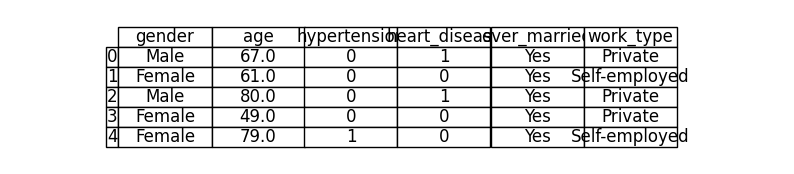

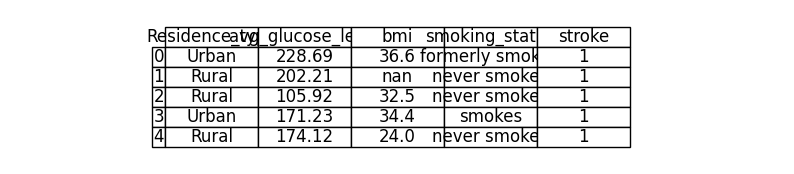

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Assuming df is your DataFrame and it is already defined
# df = pd.read_csv('your_data.csv')  # Example of how you might load your DataFrame

# Extract the first five observations
first_five = df.head()

# Split the DataFrame into two parts: first 6 columns and next 5 columns
first_six_columns = first_five.iloc[:, :6]
next_five_columns = first_five.iloc[:, 6:11]  # Adjust the range if there are more columns

# Function to save the table as an image
def save_table_as_image(data, filename):
    fig, ax = plt.subplots(figsize=(10, 2))  # Adjust figsize to make the table fit well

    # Hide axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    # Create the table
    tbl = table(ax, data, loc='center', cellLoc='center', colWidths=[0.1]*len(data.columns))

    # Adjust table properties
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(12)
    tbl.scale(1.2, 1.2)

    # Save the plot as an image
    #plt.savefig(f'{filename}.png', dpi=300, bbox_inches='tight')  # High-resolution PNG
    plt.savefig(f'{filename}.svg', bbox_inches='tight')  # Vector graphic (SVG)
    #plt.savefig(f'{filename}.pdf', bbox_inches='tight')  # Vector graphic (PDF)

    # Show the plot
    plt.show()

# Save the first 6 columns as an image
save_table_as_image(first_six_columns, 'first_six_columns')

# Save the next 5 columns as an image
save_table_as_image(next_five_columns, 'next_five_columns')


In [12]:
df.dtypes # Data Type of the features

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

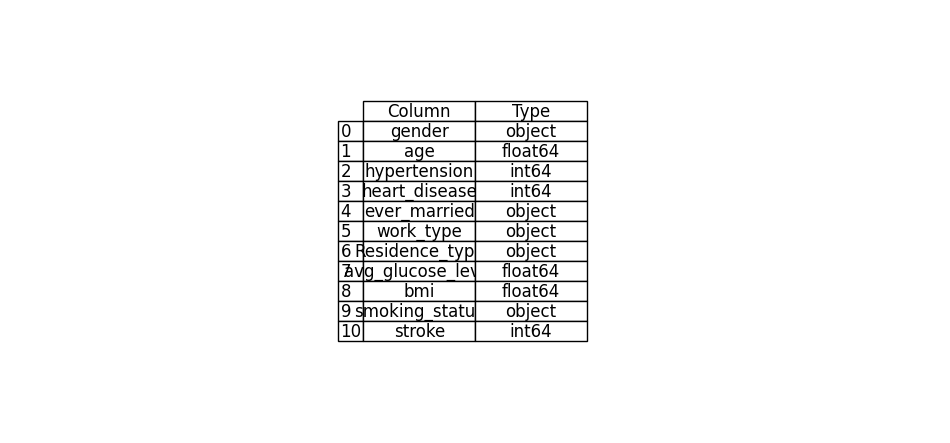

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Assuming df is your DataFrame and it is already defined
# df = pd.read_csv('your_data.csv')  # Example of how you might load your DataFrame

# Extract the data types of all columns
dtypes = df.dtypes.to_frame('Type').reset_index()
dtypes.columns = ['Column', 'Type']

# Function to save the table as an image
def save_table_as_image(data, filename):
    fig, ax = plt.subplots(figsize=(12, len(data) * 0.5))  # Adjust figsize to make the table fit well

    # Hide axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    # Create the table
    tbl = table(ax, data, loc='center', cellLoc='center', colWidths=[0.1]*len(data.columns))

    # Adjust table properties
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(12)
    tbl.scale(1.2, 1.2)

    # Save the plot as an image
    #plt.savefig(f'{filename}.png', dpi=300, bbox_inches='tight')  # High-resolution PNG
    plt.savefig(f'{filename}.svg', bbox_inches='tight')  # Vector graphic (SVG)
   # plt.savefig(f'{filename}.pdf', bbox_inches='tight')  # Vector graphic (PDF)

    # Show the plot
    plt.show()

# Save the dtypes table as an image
save_table_as_image(dtypes, 'dtypes_table')


In [14]:
df.describe # To describe the data

<bound method NDFrame.describe of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_ty

In [15]:

df.shape #Number of Rows and Columns or Observations and Features

(5110, 11)

## DATA PREPROCESSING

## Dealing with Null Values

In [16]:
df.isna().sum() # Will give tatal number of null values in every column

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

BMI have 201 null values

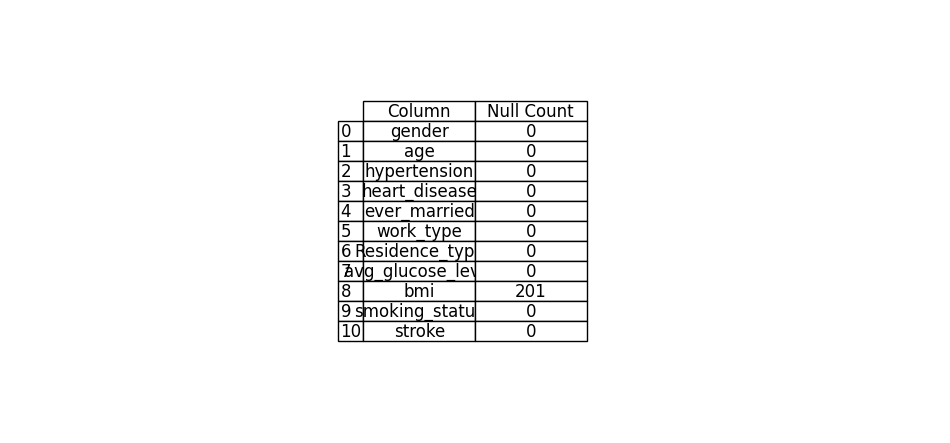

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Assuming df is your DataFrame and it is already defined
# df = pd.read_csv('your_data.csv')  # Example of how you might load your DataFrame

# Extract the count of null values for each column
null_counts = df.isna().sum().to_frame('Null Count').reset_index()
null_counts.columns = ['Column', 'Null Count']

# Function to save the table as an image
def save_table_as_image(data, filename):
    fig, ax = plt.subplots(figsize=(12, len(data) * 0.5))  # Adjust figsize to make the table fit well

    # Hide axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    # Create the table
    tbl = table(ax, data, loc='center', cellLoc='center', colWidths=[0.1]*len(data.columns))

    # Adjust table properties
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(12)
    tbl.scale(1.2, 1.2)

    # Save the plot as an image
    #plt.savefig(f'{filename}.png', dpi=300, bbox_inches='tight')  # High-resolution PNG
    plt.savefig(f'{filename}.svg', bbox_inches='tight')  # Vector graphic (SVG)
    #plt.savefig(f'{filename}.pdf', bbox_inches='tight')  # Vector graphic (PDF)

    # Show the plot
    plt.show()

# Save the null counts table as an image
save_table_as_image(null_counts, 'null_counts_table')


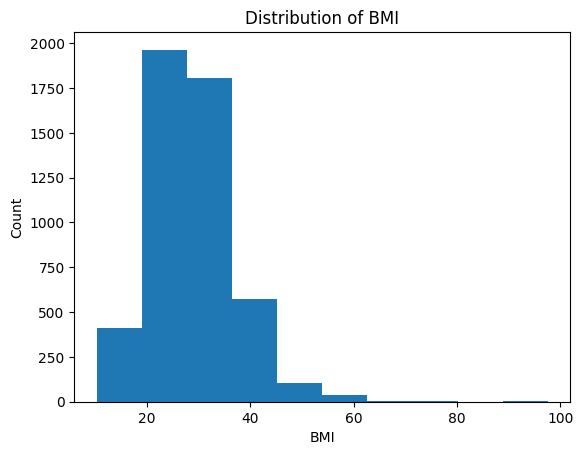

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and it is already defined
# df = pd.read_csv('your_data.csv')  # Example of how you might load your DataFrame

# Plot the histogram
df['bmi'].plot.hist(bins=10)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')

# Save the plot in different formats
#plt.savefig('figure.png', dpi=300)  # High-resolution PNG
plt.savefig('figure.svg')  # Vector graphic (SVG)
#plt.savefig('figure.pdf')  # Vector graphic (PDF)

# Show the plot
plt.show()



In [19]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median()) # Using meadian metjod tto fill the null values

In [20]:
df.isna().sum() # Re check

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

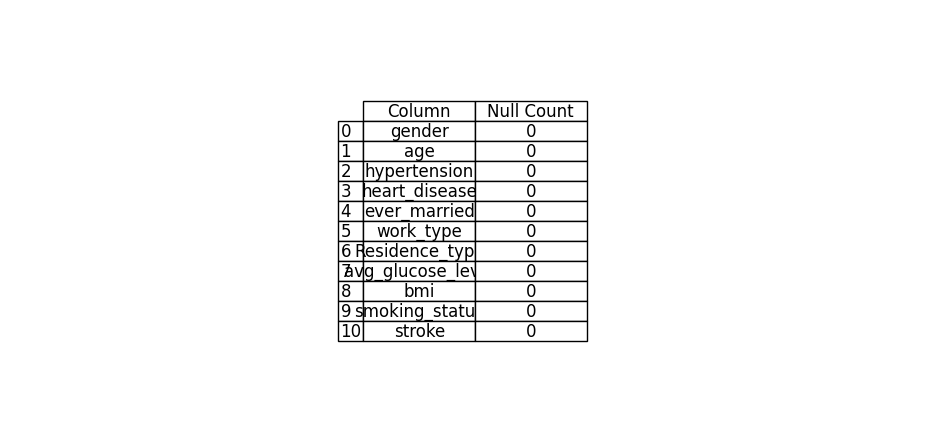

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Assuming df is your DataFrame and it is already defined
# df = pd.read_csv('your_data.csv')  # Example of how you might load your DataFrame

# Extract the count of null values for each column
null_counts = df.isna().sum().to_frame('Null Count').reset_index()
null_counts.columns = ['Column', 'Null Count']

# Function to save the table as an image
def save_table_as_image(data, filename):
    fig, ax = plt.subplots(figsize=(12, len(data) * 0.5))  # Adjust figsize to make the table fit well

    # Hide axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    # Create the table
    tbl = table(ax, data, loc='center', cellLoc='center', colWidths=[0.1]*len(data.columns))

    # Adjust table properties
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(12)
    tbl.scale(1.2, 1.2)

    # Save the plot as an image
    #plt.savefig(f'{filename}.png', dpi=300, bbox_inches='tight')  # High-resolution PNG
    plt.savefig(f'{filename}.svg', bbox_inches='tight')  # Vector graphic (SVG)
    #plt.savefig(f'{filename}.pdf', bbox_inches='tight')  # Vector graphic (PDF)

    # Show the plot
    plt.show()

# Save the null counts table as an image
save_table_as_image(null_counts, 'null_counts_table_after')


## Dealing with Duplicates

In [22]:
df.duplicated().sum() 

np.int64(0)

## Dealing with Outliers

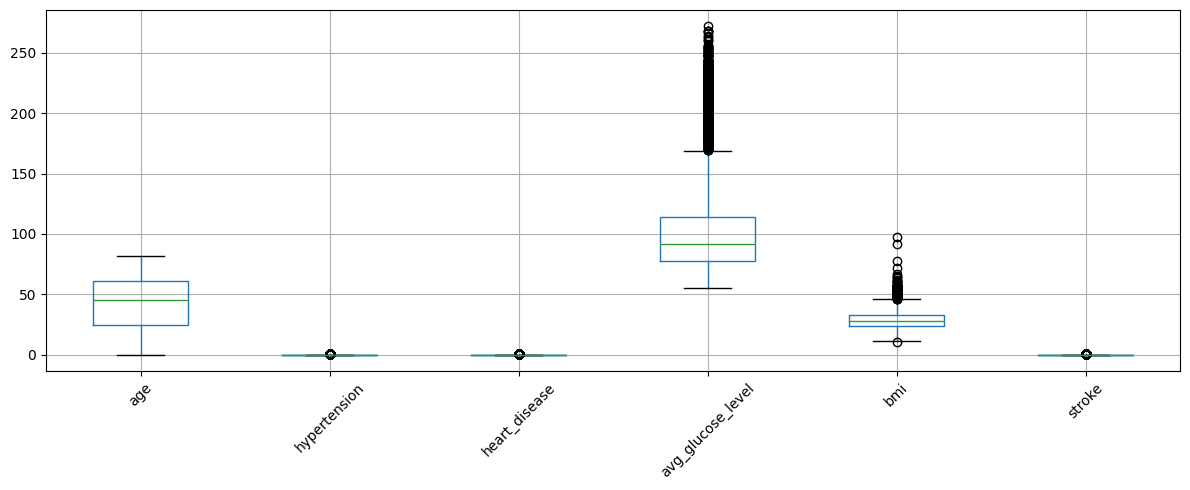

In [23]:
plt.figure(figsize=(12, 5))
df.boxplot(fontsize=10)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('boxplot1.svg')
plt.show()

Outliers can be seen in 'Average Glucose Level', 'BMI'

In [24]:
# Using IQR to to detect outliers
for var in ['avg_glucose_level', 'bmi']:
  percentile25 = df[var].quantile(0.25)
  percentile75 = df[var].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  outliers = df[(df[var] > upper_limit) | (df[var] < lower_limit)]

  # Counting how many rows in the data contain outliers in `tenure`
  print(F"Number of rows in the data containing outliers in {var}:", len(outliers))

Number of rows in the data containing outliers in avg_glucose_level: 627
Number of rows in the data containing outliers in bmi: 126


In [25]:
# Using IQR to to remove outliers
for col in ['avg_glucose_level', 'bmi']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Number of rows after removing outliers
print(f"Number of rows after removing outliers: {df.shape[0]}")

Number of rows after removing outliers: 4383


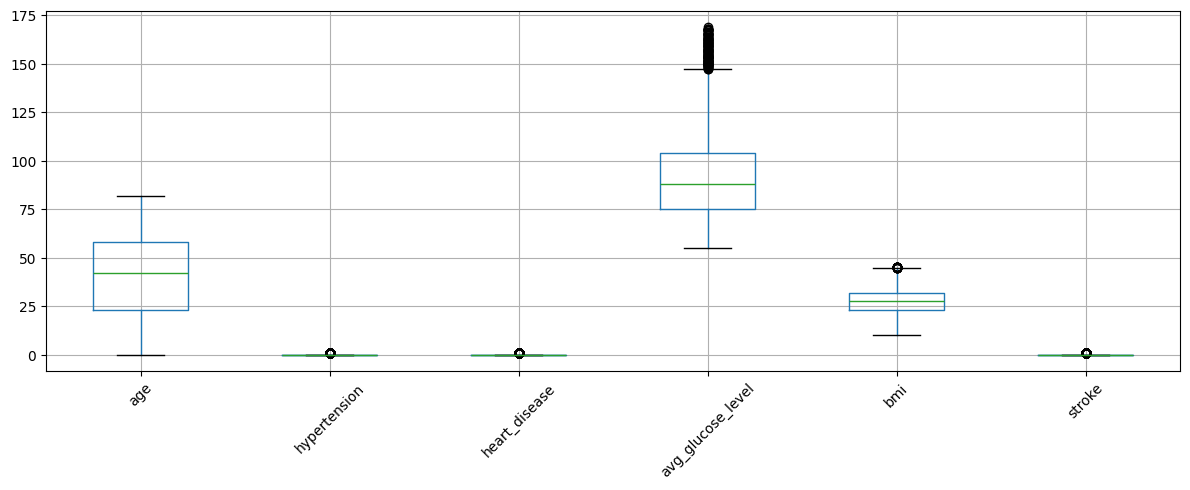

In [26]:
plt.figure(figsize=(12, 5))
df.boxplot(fontsize=10)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('boxplot2.svg')
plt.show()

In [27]:
df['stroke'] = df['stroke'].astype('category') # Make 0 as Unstroke and 1 as stroke

Numerical columns

In [28]:
# Unique value counts for each column
unique_counts = df.nunique()
# Threshold to distinguish continuous and categorical
threshold = 10

num_cols = unique_counts[unique_counts > threshold].index.tolist()

## Feature Transformation

In [29]:
def visualize_feature_distribution(data):
    data = data.apply(pd.to_numeric, errors='coerce')
    sns.set(style="whitegrid")
    num_features = len(data.columns)
    num_cols = 3  
    num_rows = -(-num_features // num_cols)  
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(data.columns):
        sns.histplot(data[column], kde=True, color="skyblue", bins=30, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

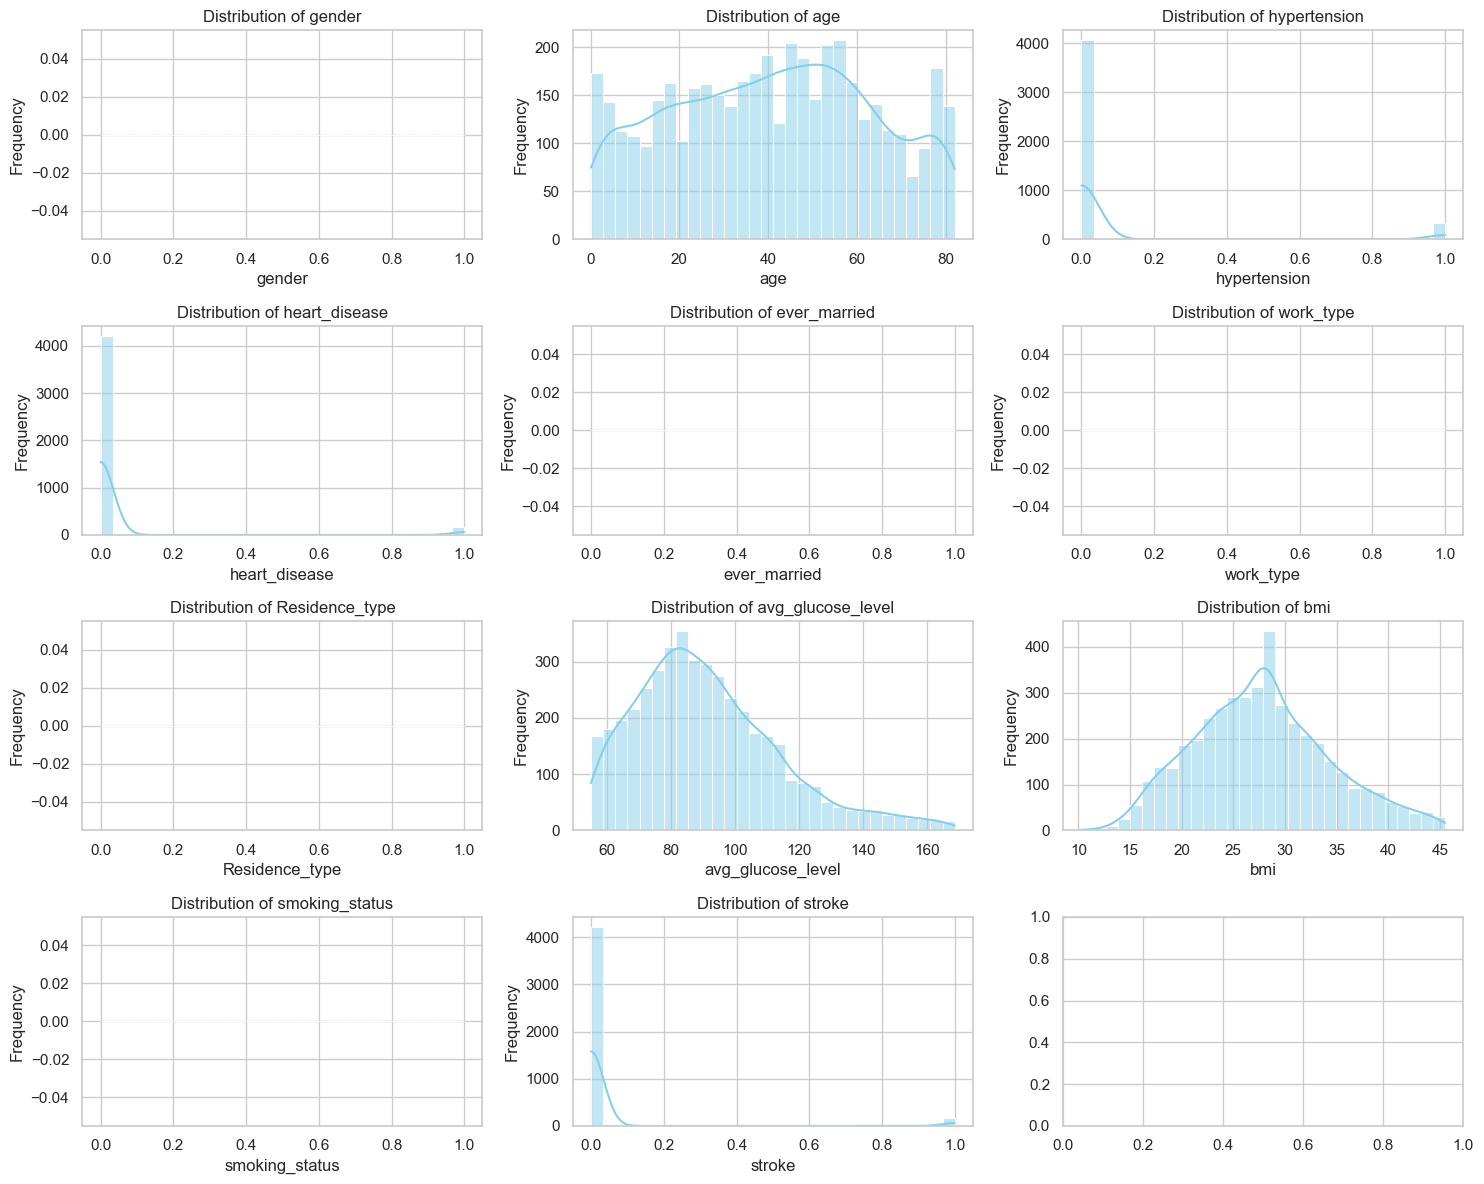

In [30]:
import warnings
warnings.filterwarnings('ignore')
visualize_feature_distribution(df)

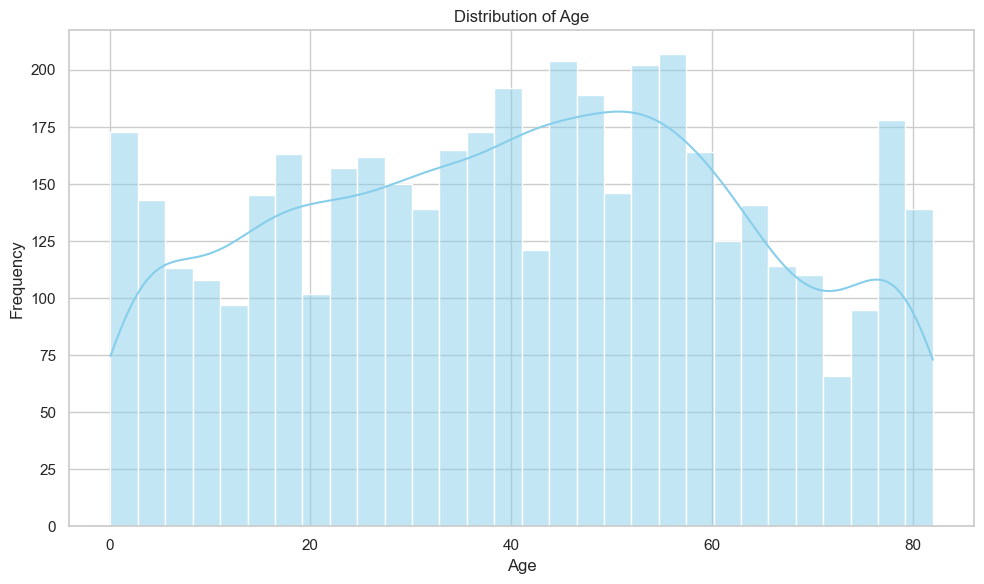

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def visualize_age_distribution(data, filename):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(data['age'], kde=True, color="skyblue", bins=30)
    ax.set_title('Distribution of Age')
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f'{filename}.svg', format='svg')  # Save as SVG
    plt.show()

# Example usage:
# Assuming df is your DataFrame
visualize_age_distribution(df, 'age_distribution')



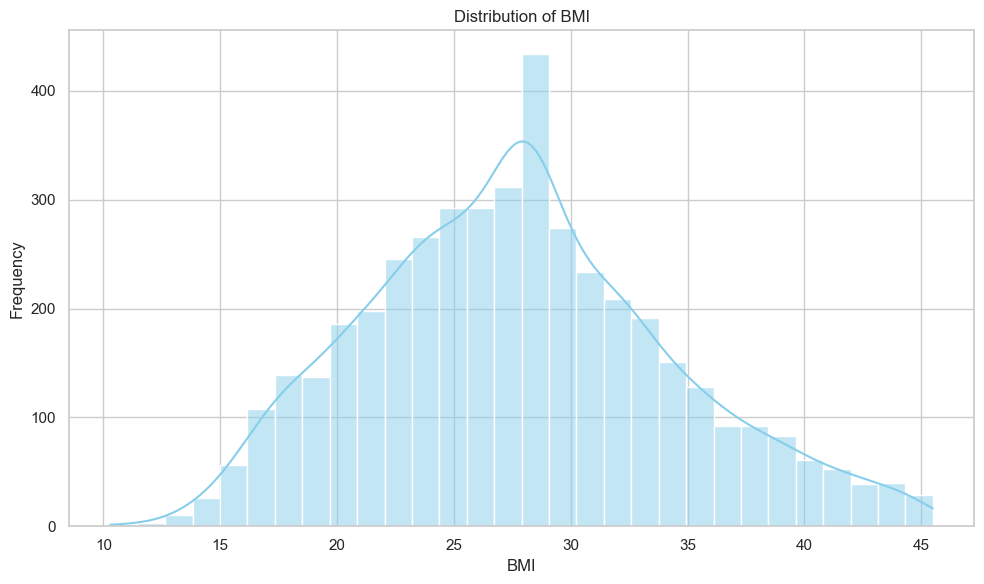

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def visualize_age_distribution(data, filename):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(data['bmi'], kde=True, color="skyblue", bins=30)
    ax.set_title('Distribution of BMI')
    ax.set_xlabel('BMI')
    ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f'{filename}.svg', format='svg')  # Save as SVG
    plt.show()

# Example usage:
# Assuming df is your DataFrame
visualize_age_distribution(df, 'bmi_distribution')


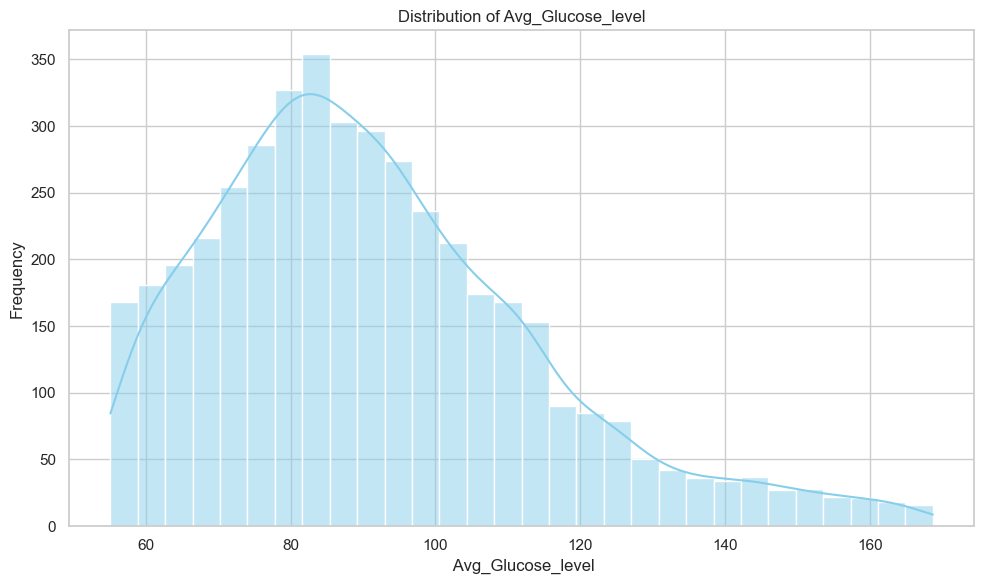

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def visualize_age_distribution(data, filename):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(data['avg_glucose_level'], kde=True, color="skyblue", bins=30)
    ax.set_title('Distribution of Avg_Glucose_level')
    ax.set_xlabel(' Avg_Glucose_level')
    ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f'{filename}.svg', format='svg')  # Save as SVG
    plt.show()

# Example usage:
# Assuming df is your DataFrame
visualize_age_distribution(df, 'avgl2_distribution')


In [34]:
df['avg_glucose_level'] = np.log1p(df['avg_glucose_level'])

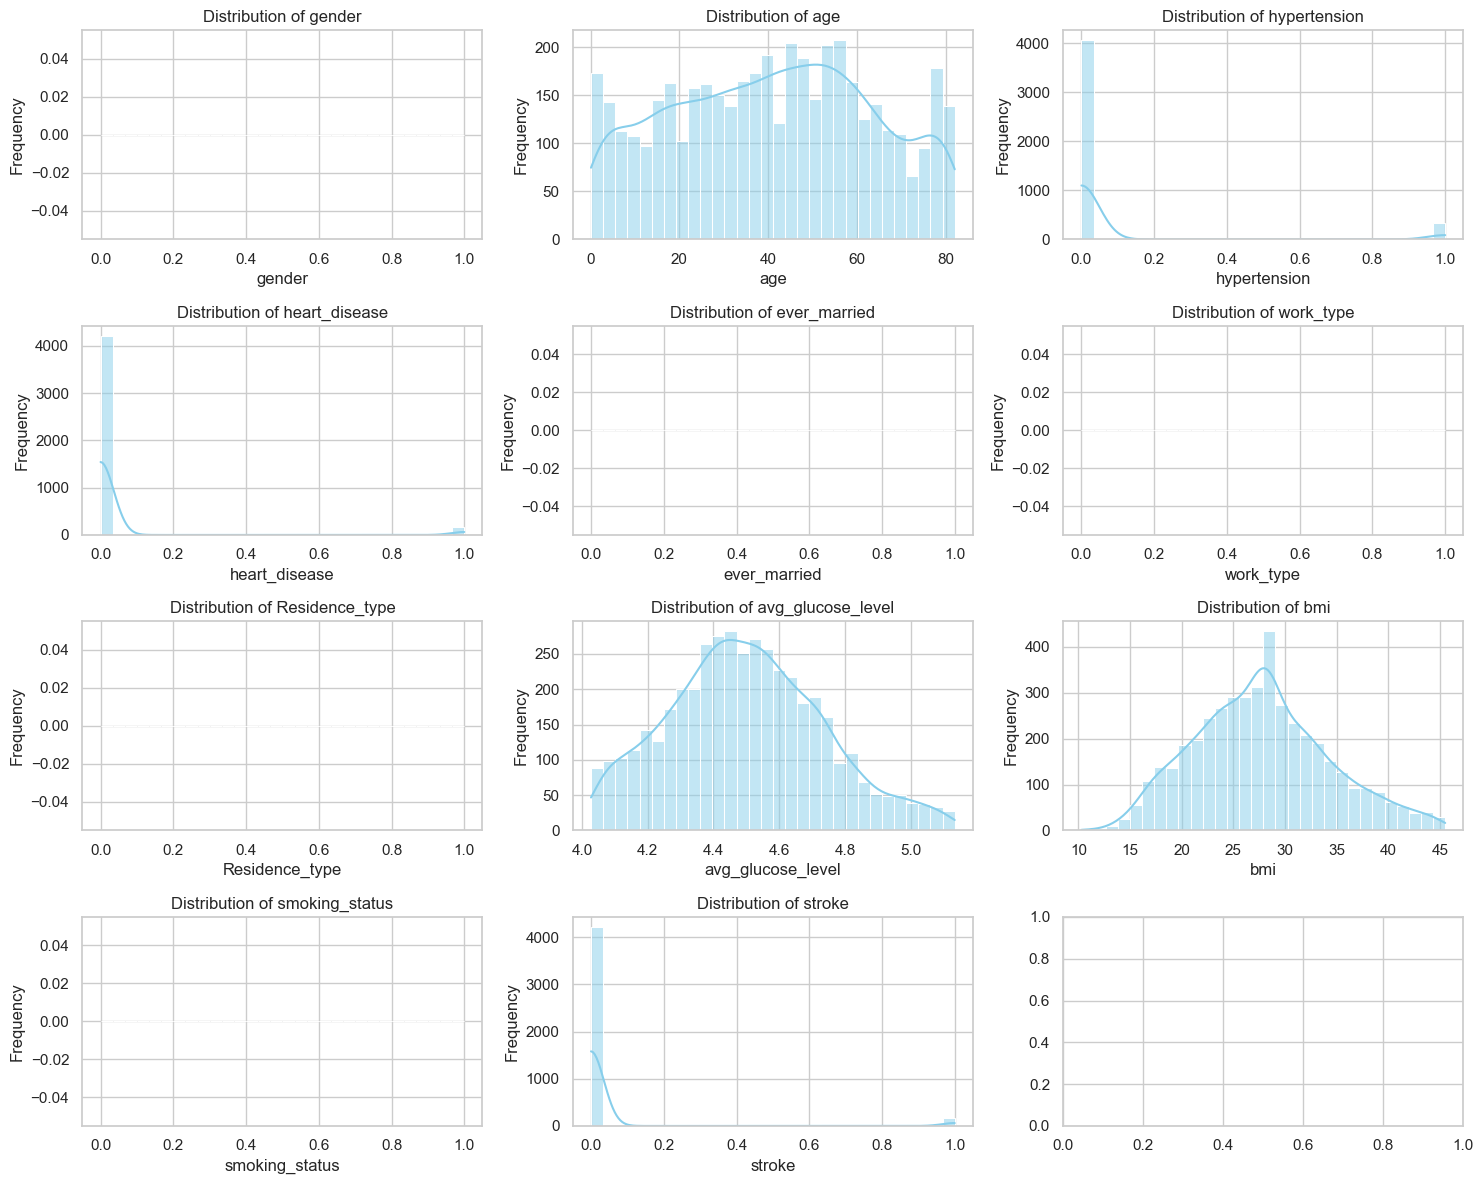

In [35]:
visualize_feature_distribution(df)

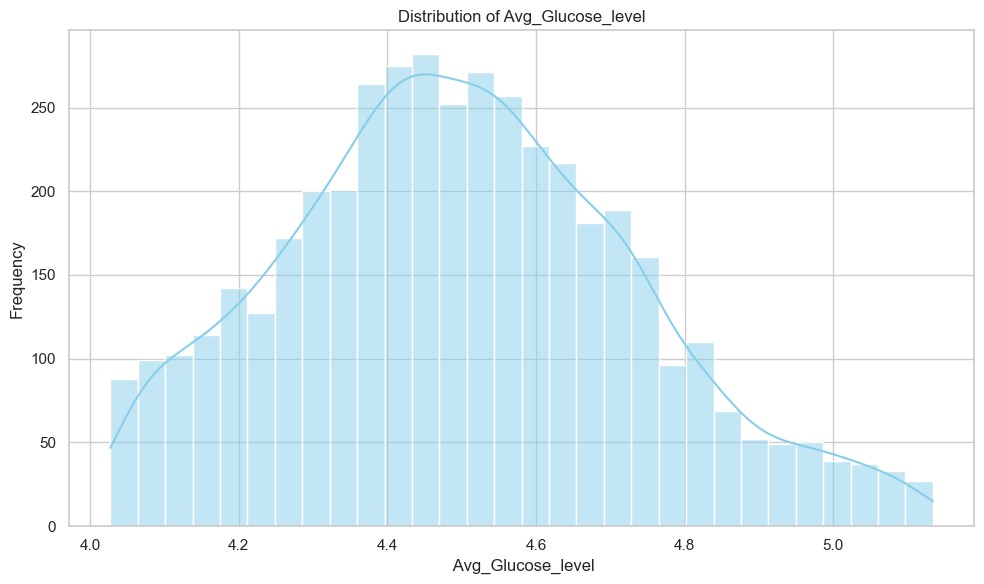

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def visualize_age_distribution(data, filename):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(data['avg_glucose_level'], kde=True, color="skyblue", bins=30)
    ax.set_title('Distribution of Avg_Glucose_level')
    ax.set_xlabel(' Avg_Glucose_level')
    ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f'{filename}.svg', format='svg')  # Save as SVG
    plt.show()

# Example usage:
# Assuming df is your DataFrame
visualize_age_distribution(df, 'avgl11_distribution')

## Correlation

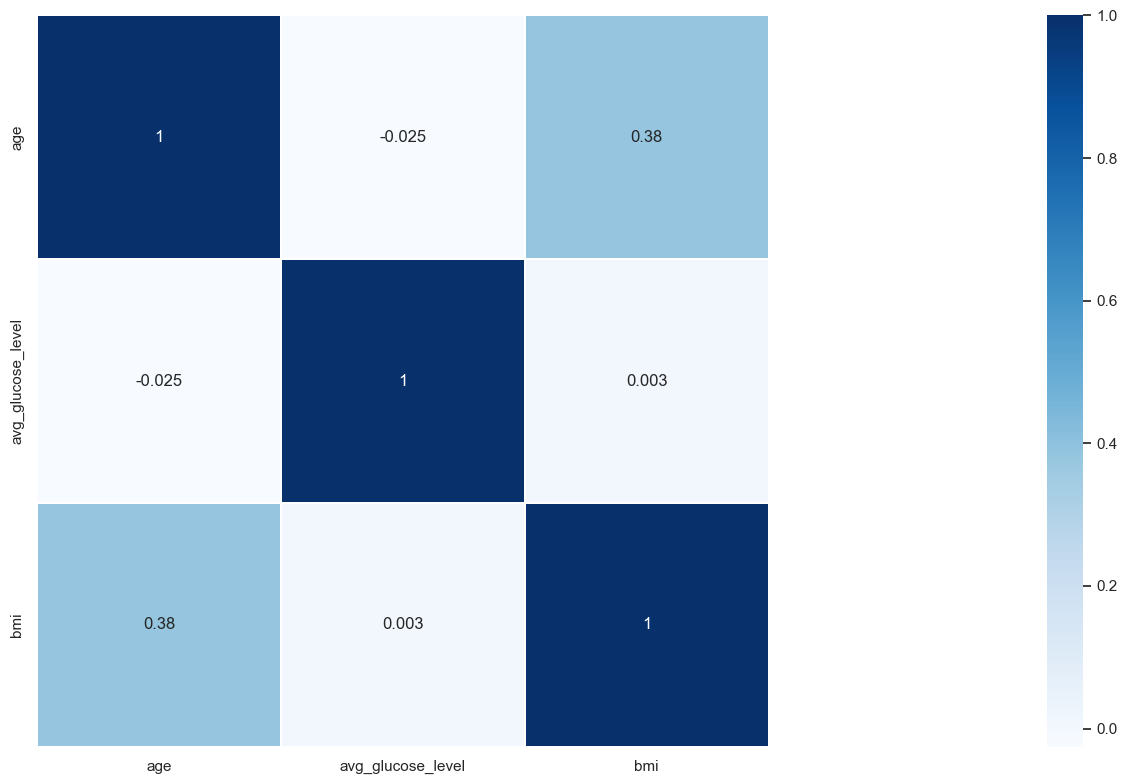

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import time

plt.figure(figsize=(56, 8))
corr = df.loc[:, num_cols].corr(method="pearson")
sns.heatmap(corr, cmap='Blues', square=True, linewidths=.2, annot=True)
plt.tight_layout()
plt.savefig('heatmap1.png', format='png')
plt.show()

# Add a delay to ensure plot rendering
#time.sleep(1)

  # Save as SVG



## Feature Selection

## Chi Square test 

In [38]:
df['smoking_status'].unique()

array(['never smoked', 'Unknown', 'smokes', 'formerly smoked'],
      dtype=object)

In [39]:
frequency_distribution = df['smoking_status'].value_counts()
print("Frequency Distribution:\n", frequency_distribution)

Frequency Distribution:
 smoking_status
never smoked       1592
Unknown            1417
formerly smoked     707
smokes              667
Name: count, dtype: int64


In [40]:
contingency_table = pd.crosstab(df['smoking_status'], df['stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 24.519285406354893
P-value: 1.9459704489725994e-05


Significant association between Smoking status and Stroke

In [41]:

df['work_type'].unique()

array(['Private', 'Govt_job', 'Self-employed', 'children', 'Never_worked'],
      dtype=object)

In [42]:
frequency_distribution = df['work_type'].value_counts()
print("Frequency Distribution:\n", frequency_distribution)

Frequency Distribution:
 work_type
Private          2476
children          675
Self-employed     659
Govt_job          551
Never_worked       22
Name: count, dtype: int64


In [43]:
contingency_table = pd.crosstab(df['work_type'], df['stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 46.06663706176117
P-value: 2.38545157436675e-09


Significant association between Work type and Stroke

In [44]:
frequency_distribution = df['ever_married'].value_counts()
print("Frequency Distribution:\n", frequency_distribution)

Frequency Distribution:
 ever_married
Yes    2730
No     1653
Name: count, dtype: int64


In [45]:
contingency_table = pd.crosstab(df['ever_married'], df['stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 37.62054260180537
P-value: 8.593467720140561e-10


In [46]:
contingency_table = pd.crosstab(df['Residence_type'], df['stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 0.26712585273353606
P-value: 0.6052663234730102


Null hypothesis is accepted hence we can say that RT does not significant assciation with Stroke

In [47]:
# Droping Residence type from dataset
df.drop(['Residence_type'], axis = 1, inplace = True)

In [48]:
df.dtypes

gender                 object
age                   float64
hypertension            int64
heart_disease           int64
ever_married           object
work_type              object
avg_glucose_level     float64
bmi                   float64
smoking_status         object
stroke               category
dtype: object

## Threshold Variance

In [49]:
# For feature selection first we have split our data into train and test

from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.22)

In [50]:
X_numeric = X.apply(pd.to_numeric, errors='coerce')
feature_variances = X_numeric.var()
max_variance = feature_variances.max()
print("Maximum Variance Across Features:", max_variance)

Maximum Variance Across Features: 509.17956774538527


In [51]:
from sklearn.feature_selection import VarianceThreshold

X_numerical = X.select_dtypes(include='float64')
selector = VarianceThreshold(threshold=6)
X_selected = selector.fit_transform(X_numeric)

In [52]:
selected_features_indices = selector.get_support()
selected_feature_names = X.columns[selected_features_indices]

print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: Index(['age', 'bmi'], dtype='object')


## Numerical and Categorical Columns

In [53]:
# Unique value counts for each column
unique_counts = df.nunique()
# Threshold to distinguish continuous and categorical
threshold = 10

num_cols = unique_counts[unique_counts > threshold].index.tolist()
cat_cols = unique_counts[unique_counts <= threshold].index.tolist()

# Removing the 'stroke' from categorical since it's our target variable
if 'stroke' in cat_cols:
    cat_cols.remove('stroke')

# Convert to category datatype
for col in cat_cols:
  df[col] = df[col].astype('category')

## Standardization

In [54]:
scaler = StandardScaler().set_output(transform='pandas')
df_num = df[num_cols].copy()
df_num = scaler.fit_transform(df_num)

In [55]:
df_cat = pd.get_dummies(df[cat_cols], drop_first=True)

In [56]:

X = pd.concat([df_num, df_cat], axis=1)
y = df[['stroke']].copy()

## Imbalanced Dataset

In [57]:
import pandas as pd


stroke_column = df['stroke']

# Count occurrences of 1's and 0's
count_ones = (stroke_column == 1).sum()
count_zeros = (stroke_column == 0).sum()

print("Number of 1's:", count_ones)
print("Number of 0's:", count_zeros)

Number of 1's: 164
Number of 0's: 4219


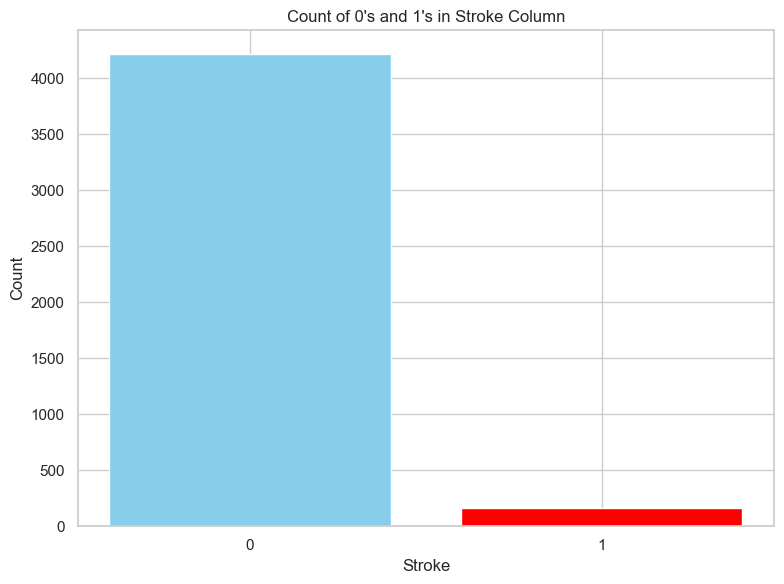

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# stroke_column = df['stroke']

# Count occurrences of 1's and 0's
count_ones = (df['stroke'] == 1).sum()
count_zeros = (df['stroke'] == 0).sum()

# Data for plotting
counts = [count_zeros, count_ones]
labels = ['0', '1']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['skyblue', 'red'])
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Count of 0\'s and 1\'s in Stroke Column')
plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig('stroke_counts.svg', format='svg')  # Save as SVG

# Display the plot
plt.show()


In [59]:
over = SMOTE(sampling_strategy = 1)
X_smote, y_smote = over.fit_resample(X, y)

In [60]:
y_smote.value_counts()

stroke
0         4219
1         4219
Name: count, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

In [62]:
def get_test_scores(model_name:str, preds, y_test_data, auc):
    table = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'AUC'])
    table.loc[0] = {
        'Model': model_name,
        'Precision': precision_score(y_test_data, preds),
        'Recall': recall_score(y_test_data, preds),
        'F1 Score': f1_score(y_test_data, preds),
        'Accuracy': accuracy_score(y_test_data, preds),
        'AUC': auc
    }
    return table

In [63]:
test_scores = []
target_names = ['No stroke', 'Stroke']
models = [
          GaussianNB(),
          RandomForestClassifier(),
          KNeighborsClassifier()
          ]
model_name_list = []
model_metrics = {}

for mdl in models:
    model = mdl.fit(X_train, y_train)
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    report  = classification_report(y_test, y_pred, target_names=target_names)

    # Calculate ROC and AUC
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    test_score = get_test_scores(model_name, y_pred, y_test, auc )

    model_metrics[model_name] = [model, y_pred, report, fpr, tpr, auc, test_score]

In [64]:
for key, value in model_metrics.items():
  print(f"Report for {key} model:")
  print(value[2])

Report for GaussianNB model:
              precision    recall  f1-score   support

   No stroke       0.97      0.34      0.51      1054
      Stroke       0.60      0.99      0.75      1056

    accuracy                           0.67      2110
   macro avg       0.79      0.67      0.63      2110
weighted avg       0.79      0.67      0.63      2110

Report for RandomForestClassifier model:
              precision    recall  f1-score   support

   No stroke       0.97      0.92      0.94      1054
      Stroke       0.93      0.97      0.95      1056

    accuracy                           0.95      2110
   macro avg       0.95      0.95      0.95      2110
weighted avg       0.95      0.95      0.95      2110

Report for KNeighborsClassifier model:
              precision    recall  f1-score   support

   No stroke       0.97      0.82      0.89      1054
      Stroke       0.84      0.98      0.91      1056

    accuracy                           0.90      2110
   macro avg       

In [65]:
scores_list = [model_metrics[x][6] for  x in model_metrics.keys()]
final_test_scores = pd.concat(scores_list)
final_test_scores.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

,Model,Precision,Recall,F1 Score,Accuracy,AUC
0,RandomForestClassifier,0.925792,0.968750,0.946784,0.945498,0.988319
1,KNeighborsClassifier,0.844517,0.977273,0.906058,0.898578,0.955850
2,GaussianNB,0.601495,0.990530,0.748479,0.666825,0.834624


## Fine Tunning of Parameters to increase the accuracy of RF

In [66]:
param_grid = {
    'n_estimators': [500,1000,1500,2000,3000],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rfc = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(rfc, param_grid, cv=5,scoring='accuracy',verbose=1, n_jobs=7)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters:", best_params)

# Train the model with the best parameters
best_rfc = RandomForestClassifier(**best_params)
best_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklea

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 500}


RandomForestClassifier(min_samples_split=3, n_estimators=500)

In [67]:
# Evaluate the model on the test set
preds = best_rfc.predict(X_test)
evaluation_table = get_test_scores('rfc', preds,y_test, auc)

# Display the evaluation table
print(evaluation_table)

  Model  Precision    Recall  F1 Score  Accuracy      AUC
0   rfc   0.921692  0.969697  0.945085  0.943602  0.95585


In [68]:
import pickle

# Assuming `model` is your trained model object
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(best_rfc, f)


In [69]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define values of k to try
k_values = [1, 3, 5, 7, 8]

# Define number of folds for cross-validation
num_folds = 5

# Create k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store average performance for each value of k
avg_scores = []

# Iterate over each value of k
for k in k_values:
    # Initialize k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform cross-validation
    scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
    
    # Compute average performance
    avg_score = np.mean(scores)
    avg_scores.append(avg_score)

# Find the index of the best performing k
best_k_idx = np.argmax(avg_scores)
best_k = k_values[best_k_idx]
best_score = avg_scores[best_k_idx]

print("Best k:", best_k)
print("Average performance:", best_score)


Best k: 8
Average performance: 0.9621246674268338


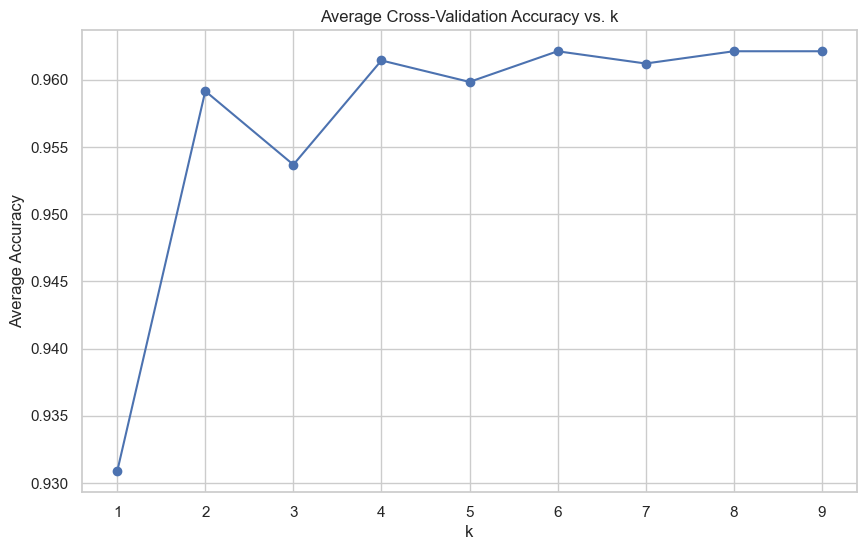

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Define values of k to try
k_values = range(1, 10)  

# Define number of folds for cross-validation
num_folds = 5

# Create k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize list to store average accuracy for each value of k
avg_accuracies = []

# Load your data into X and y
# Assuming you have loaded your data into X and y

# Iterate over each value of k
for k in k_values:
    # Initialize k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform cross-validation
    accuracies = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
    
    # Compute average accuracy
    avg_accuracy = np.mean(accuracies)
    
    # Append average accuracy to the list
    avg_accuracies.append(avg_accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_accuracies, marker='o', linestyle='-')
plt.title('Average Cross-Validation Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('KNN.svg', format='svg')  # Save as SVG
plt.show()



In [71]:
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Define a function to plot confusion matrix
# def plot_confusion_matrix(model, X_test, y_test, model_name):
#     # Predictions
#     y_pred = model.predict(X_test)
#     # Calculate confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
#     # Plot confusion matrix
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
#                 xticklabels=['No stroke', 'Stroke'],
#                 yticklabels=['No stroke', 'Stroke'])
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title(f'Confusion Matrix - {model_name}')
#     plt.show()

# # Plot confusion matrix for RandomForestClassifier
# plot_confusion_matrix(rf_epoch, X_test, y_test, 'RandomForestClassifier')

# # Plot confusion matrix for KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=8)  # Using the best k found
# knn.fit(X_train, y_train)
# plot_confusion_matrix(knn, X_test, y_test, 'KNeighborsClassifier')

# # Plot confusion matrix for Naive Bayes
# nb = GaussianNB()
# nb.fit(X_train, y_train)

# plot_confusion_matrix(nb, X_test, y_test, 'Naive Bayes')



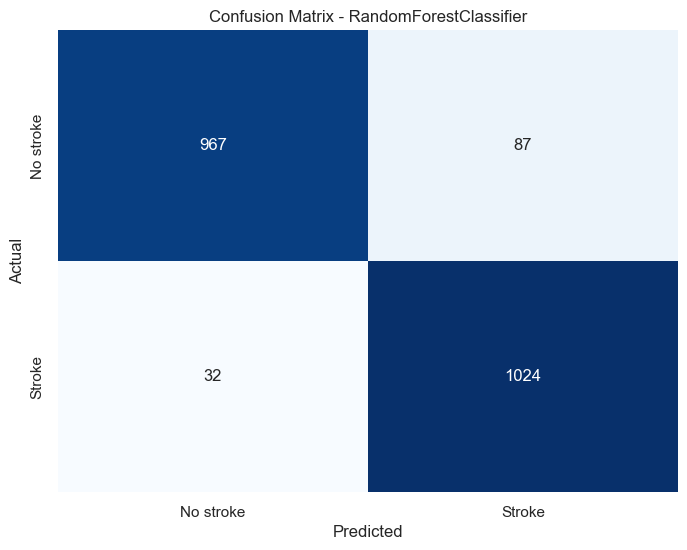

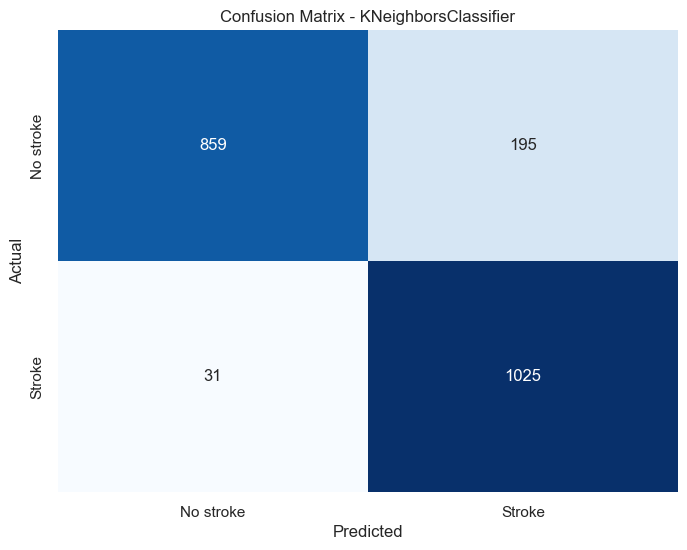

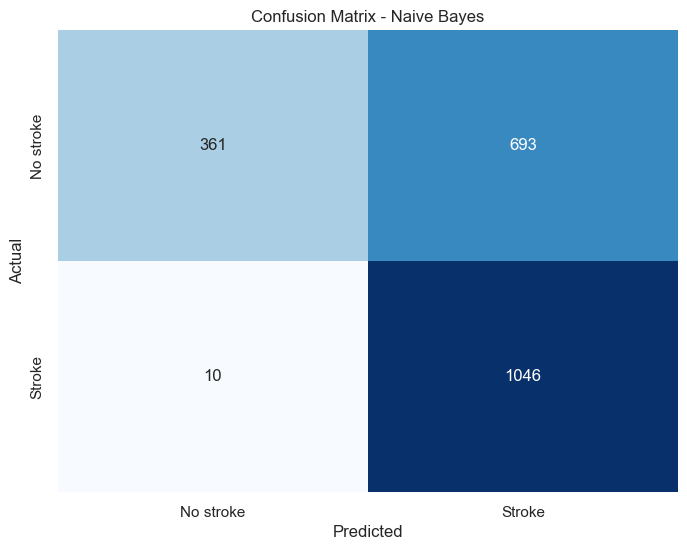

In [72]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot confusion matrix and save as SVG
def plot_confusion_matrix(model, X_test, y_test, model_name, save_as_svg=False):
    # Predictions
    y_pred = model.predict(X_test)
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No stroke', 'Stroke'],
                yticklabels=['No stroke', 'Stroke'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    # Save plot as SVG if specified
    if save_as_svg:
        plt.savefig(f'confusion_matrix_{model_name}.svg', format='svg', bbox_inches='tight')
    plt.show()

# Plot confusion matrix for RandomForestClassifier and save as SVG
plot_confusion_matrix(best_rfc, X_test, y_test, 'RandomForestClassifier', save_as_svg=True)

# Plot confusion matrix for KNeighborsClassifier and save as SVG
knn = KNeighborsClassifier(n_neighbors=best_k)  # Using the best k found
knn.fit(X_train, y_train)
plot_confusion_matrix(knn, X_test, y_test, 'KNeighborsClassifier', save_as_svg=True)

# Plot confusion matrix for Naive Bayes and save as SVG
nb = GaussianNB()
nb.fit(X_train, y_train)
plot_confusion_matrix(nb, X_test, y_test, 'Naive Bayes', save_as_svg=True)


In [73]:
# # Access the first observation in the resampled dataset
# first_observation_features = X_smote.iloc[0]
# first_observation_target = y_smote.iloc[0]

# # Print the first observation's features and target
# print("First observation features:", first_observation_features)
# print("First observation target:", first_observation_target)


## Prediciton using RF

In [74]:
# def predict_stroke_rf(model, feature_data):
#     # Take user input for feature values
#     input_data = {}
#     for feature in feature_data.columns:
#         value = input(f"Enter {feature}: ")
#         input_data[feature] = float(value)

#     # Convert input data to DataFrame
#     input_df = pd.DataFrame([input_data])

#     # Make prediction
#     prediction = model.predict(input_df)
#     probability = model.predict_proba(input_df)[:, 1]

#     return prediction[0], probability[0], input_data  # Also returning input_data

# # Choose the Random Forest model for prediction
# chosen_model_rf = best_rfc  # Using the best RandomForestClassifier obtained from GridSearchCV

# # Predict using user input
# prediction_rf, probability_rf, input_data_rf = predict_stroke_rf(chosen_model_rf, X)
# print("Input Data:", input_data_rf)  # Displaying input data
# print("Random Forest Prediction:", prediction_rf)
# print("Random Forest Probability of Stroke:", probability_rf)


## Prediction using KNN

In [75]:
# from sklearn.neighbors import KNeighborsClassifier
# import numpy as np

# def predict_stroke_knn(model, feature_data):
#     # Take user input for feature values
#     input_data = []
#     for feature in feature_data.columns:
#         value = input(f"Enter {feature}: ")
#         input_data.append(float(value))

#     # Reshape the input data to match the model's input shape
#     input_data = np.array(input_data).reshape(1, -1)

#     # Make prediction
#     prediction = model.predict(input_data)
#     probability = model.predict_proba(input_data)[:, 1]

#     return prediction[0], probability[0]

# # Choose the KNN classifier model for prediction
# knn_classifier = KNeighborsClassifier(n_neighbors=6)  # Using K=6 based on your elbow curve analysis

# # Train the KNN classifier on the entire dataset (X_smote and y_smote)
# knn_classifier.fit(X_smote, y_smote)

# # Predict using user input
# prediction_knn, probability_knn = predict_stroke_knn(knn_classifier, feature_data)
# print("KNN Prediction:", prediction_knn)
# print("KNN Probability of Stroke:", probability_knn)


## Prediction using Naive Bayes

In [76]:
# from sklearn.naive_bayes import GaussianNB

# def predict_stroke_nb(model, feature_data):
#     # Take user input for feature values
#     input_data = {}
#     for feature in feature_data.columns:
#         value = input(f"Enter {feature}: ")
#         input_data[feature] = float(value)

#     # Convert input data to DataFrame
#     input_df = pd.DataFrame([input_data])

#     # Make prediction
#     prediction = model.predict(input_df)
#     probability = model.predict_proba(input_df)[:, 1]

#     return prediction[0], probability[0]

# # Choose the Naive Bayes (GaussianNB) classifier model for prediction
# naive_bayes_classifier = GaussianNB()

# # Train the Naive Bayes classifier on the entire dataset (X_smote and y_smote)
# naive_bayes_classifier.fit(X_smote, y_smote)

# # Predict using user input
# prediction_nb, probability_nb = predict_stroke_nb(naive_bayes_classifier, feature_data)
# print("Naive Bayes Prediction:", prediction_nb)
# print("Naive Bayes Probability of Stroke:", probability_nb)


In [77]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Define feature_data as a DataFrame with appropriate column names
# feature_data = pd.DataFrame(columns=['age', 'avg_glucose_level', 'bmi', 'gender_Male', 'gender_Other', 'hypertension_1', 
#                                       'heart_disease_1', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private',
#                                       'work_type_Self-employed', 'work_type_children', 'smoking_status_formerly smoked',
#                                       'smoking_status_never smoked', 'smoking_status_smokes'])

# # Assuming scaler is already fitted on the training data
# scaler = StandardScaler()  # Initialize a StandardScaler

# # Fit the scaler on the training data for the selected columns
# cols_to_scale = ['age', 'bmi', 'avg_glucose_level']
# scaler.fit(df_num[cols_to_scale])  # Assuming df_num contains the numerical features used for training

# def predict_stroke_rf_fine_tuned(model, scaler, feature_data):
#     # Take user input for feature values
#     input_data = {}
#     for feature in feature_data.columns:
#         value = input(f"Enter {feature}: ")
#         if feature in cols_to_scale:
#             input_data[feature] = float(value)
#         else:
#             input_data[feature] = value  # Keep binary features as strings

#     # Scale the selected columns using the stored scaler
#     scaled_input_data = pd.DataFrame(input_data, index=[0])
#     scaled_input_data[cols_to_scale] = scaler.transform(scaled_input_data[cols_to_scale])

#     # Make prediction
#     prediction = model.predict(scaled_input_data)
#     probability = model.predict_proba(scaled_input_data)[:, 1]

#     return prediction[0], probability[0], scaled_input_data.iloc[0]  # Also returning input_data

# # Choose the fine-tuned Random Forest model for prediction
# chosen_fine_tuned_model_rf = best_rfc  # Assuming best_rfc is your fine-tuned model

# # Predict using user input with fine-tuned model and scaler
# prediction_rf, probability_rf, input_data_rf = predict_stroke_rf_fine_tuned(chosen_fine_tuned_model_rf, scaler, feature_data)
# print("Input Data:", input_data_rf)  # Displaying input data
# print("Fine-tuned Random Forest Prediction:", prediction_rf)
# print("Fine-tuned Random Forest Probability of Stroke:", probability_rf)


In [78]:
# Random Forest

#rf_estimators = np.arange(start=500, step=200, stop=3000)


epoch_list_score = []
for i in param_grid:
    #rf_epoch = RandomForestClassifier(n_estimators=i)
   best_rfc.fit(X_train, y_train)
   preds = best_rfc.predict(X_test)
   accuracy = accuracy_score(preds, y_test)
   epoch_list_score.append(accuracy)
        


In [79]:
plt.plot(rf_epoch, epoch_list_score, marker = 'o')
plt.xlabel('Number of tress')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('rfce.svg', format='svg') 

NameError: name 'rf_epoch' is not defined

ValueError: x and y must have same first dimension, but have shapes (2000,) and (4,)

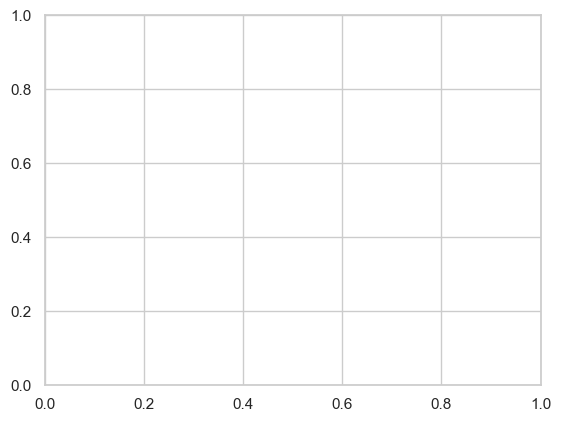

In [74]:
plt.plot(best_rfc, epoch_list_score, marker = 'o')
plt.xlabel('Number of tress')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('rfc.svg', format='svg') 

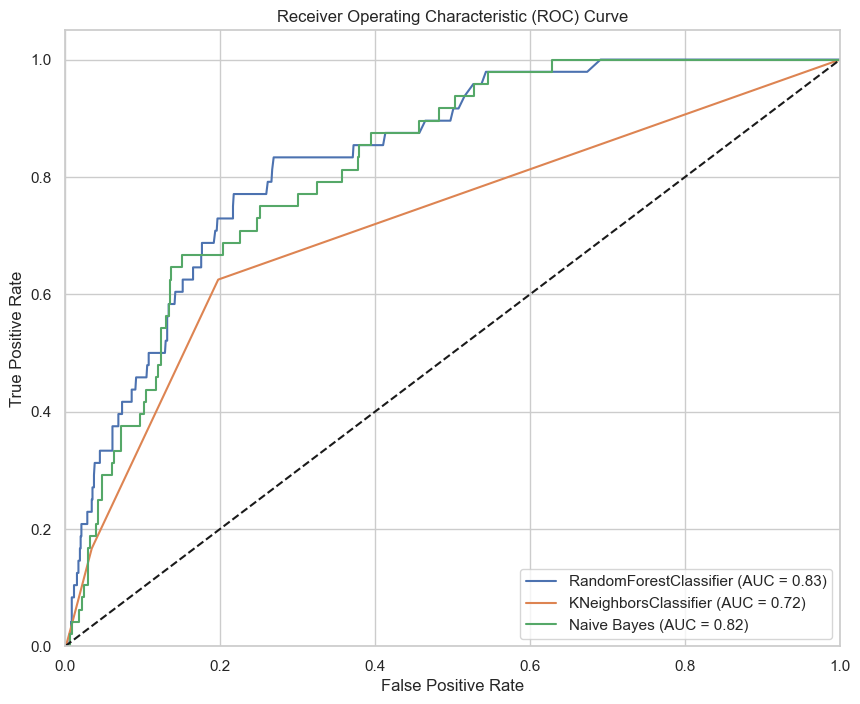

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target vector
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define and train the classifiers
# RandomForestClassifier
#rf_epoch = RandomForestClassifier(**best_params)  # Replace best_params with your hyperparameters
rf_epoch.fit(X_train, y_train)

# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)  
knn.fit(X_train, y_train)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Calculate predicted probabilities
rf_probs = rf_epoch.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
nb_probs = nb.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for each classifier
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = auc(knn_fpr, knn_tpr)

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = auc(nb_fpr, nb_tpr)

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, label=f'RandomForestClassifier (AUC = {rf_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNeighborsClassifier (AUC = {knn_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('ROC_Curve.svg', format='svg')  # Save as SVG
plt.show()


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Assuming df contains features as columns and the target variable as 'target'
X = df.drop(columns=['stroke'])  # Features
y = df['stroke']  # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
#best_rfc = RandomForestClassifier()  # You would have your best parameters here
best_rfc.fit(X_train, y_train)
rfc_pred = best_rfc.predict(X_test)

# K-Nearest Neighbors Classifier
optimal_k = 8  # You would have your optimal k here
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

# Evaluation Metrics
def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred) if len(set(y_true)) > 1 else None
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return acc, auc, precision, recall, f1

# Evaluate Random Forest Classifier
rfc_acc, rfc_auc, rfc_precision, rfc_recall, rfc_f1 = evaluate_model(y_test, rfc_pred)

# Evaluate K-Nearest Neighbors Classifier
knn_acc, knn_auc, knn_precision, knn_recall, knn_f1 = evaluate_model(y_test, knn_pred)

# Evaluate Naive Bayes Classifier
nb_acc, nb_auc, nb_precision, nb_recall, nb_f1 = evaluate_model(y_test, nb_pred)

# Print results
print("Random Forest Classifier:")
print("Accuracy:", rfc_acc)
print("AUC:", rfc_auc)
print("Precision:", rfc_precision)
print("Recall:", rfc_recall)
print("F1 Score:", rfc_f1)
print()

print("K-Nearest Neighbors Classifier:")
print("Accuracy:", knn_acc)
print("AUC:", knn_auc)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)
print()

print("Naive Bayes Classifier:")
print("Accuracy:", nb_acc)
print("AUC:", nb_auc)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)


ValueError: could not convert string to float: 'Male'

In [78]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

def get_test_scores(model_name:str, preds, y_test_data, auc):
    table = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'AUC'])
    table.loc[0] = {
        'Model': model_name,
        'Precision': precision_score(y_test_data, preds),
        'Recall': recall_score(y_test_data, preds),
        'F1 Score': f1_score(y_test_data, preds),
        'Accuracy': accuracy_score(y_test_data, preds),
        'AUC': auc
    }
    return table

test_scores = []
target_names = ['No stroke', 'Stroke']
models = [
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    KNeighborsClassifier(n_neighbors=8)  # Changed to optimal value 8
]
model_name_list = []
model_metrics = {}

# Assuming X_train, X_test, y_train, y_test are defined

for mdl in models:
    model = mdl.fit(X_train, y_train)
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=target_names)

    # Calculate ROC and AUC
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    test_score = get_test_scores(model_name, y_pred, y_test, auc)

    model_metrics[model_name] = [model, y_pred, report, fpr, tpr, auc, test_score]

for key, value in model_metrics.items():
    print(f"Report for {key} model:")
    print(value[2])

scores_list = [model_metrics['RandomForestClassifier'][6]]  # Selecting only RandomForestClassifier results
final_test_scores = pd.concat(scores_list)
final_test_scores.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)


ValueError: Number of classes, 3, does not match size of target_names, 2. Try specifying the labels parameter